In [2]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

c:\Users\alcid\Downloads\MVP\alzheimer_app\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Download latest version
# https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\alcid\.cache\kagglehub\datasets\rabieelkharoua\alzheimers-disease-dataset\versions\1


# 1- Descrição do Dataset

## 1.1 - Informações do Paciente

* ID do Paciente

  * PatientID: Um identificador único atribuído a cada paciente (4751 a 6900).

* Detalhes Demográficos

  * Idade: A idade dos pacientes varia de 60 a 90 anos.
  * Gênero: Gênero dos pacientes, onde 0 representa Masculino e 1 representa Feminino.
  * Etnia: A etnia dos pacientes, codificada da seguinte forma:
    * 0: Caucasiano
    * 1: Afro-americano
    * 2: Asiático
    * 3: Outro
  * Nível de Escolaridade: O nível de escolaridade dos pacientes, codificado da seguinte forma:
    * 0: Nenhum
    * 1: Ensino Médio
    * 2: Graduação
    * 3: Pós-graduação

* Fatores de Estilo de Vida

  * IMC: Índice de Massa Corporal dos pacientes, variando de 15 a 40.
  * Tabagismo: Status de tabagismo, onde 0 indica Não e 1 indica Sim.
  * Consumo de Álcool: Consumo semanal de álcool em unidades, variando de 0 a 20.
  * Atividade Física: Atividade física semanal em horas, variando de 0 a 10.
  * Qualidade da Dieta: Pontuação de qualidade da dieta, variando de 0 a 10.
  * Qualidade do Sono: Pontuação de qualidade do sono, variando de 4 a 10.

* Histórico Médico

  * Histórico Familiar de Alzheimer: Histórico familiar de Doença de Alzheimer, onde 0 indica Não e 1 indica Sim.
  * Doença Cardiovascular: Presença de doença cardiovascular, onde 0 indica Não e 1 indica Sim.
  * Diabetes: Presença de diabetes, onde 0 indica Não e 1 indica Sim.
  * Depressão: Presença de depressão, onde 0 indica Não e 1 indica Sim.
  * Traumatismo Craniano: Histórico de traumatismo craniano, onde 0 indica Não e 1 indica Sim.
  * Hipertensão: Presença de hipertensão, onde 0 indica Não e 1 indica Sim.

* Medições Clínicas

  * Pressão Sistólica: Pressão arterial sistólica, variando de 90 a 180 mmHg.
  * Pressão Diastólica: Pressão arterial diastólica, variando de 60 a 120 mmHg.
  * Colesterol Total: Níveis de colesterol total, variando de 150 a 300 mg/dL.
  * Colesterol LDL: Níveis de colesterol de lipoproteína de baixa densidade, variando de 50 a 200 mg/dL.
  * Colesterol HDL: Níveis de colesterol de lipoproteína de alta densidade, variando de 20 a 100 mg/dL.
  * Triglicerídeos: Níveis de triglicerídeos, variando de 50 a 400 mg/dL.

* Avaliações Cognitivas e Funcionais

  * MMSE: Escore do Mini-Exame do Estado Mental, variando de 0 a 30. Escores mais baixos indicam comprometimento cognitivo.
  * Avaliação Funcional: Escore de avaliação funcional, variando de 0 a 10. Escores mais baixos indicam maior comprometimento.
  * Queixas de Memória: Presença de queixas de memória, onde 0 indica Não e 1 indica Sim.
  * Problemas Comportamentais: Presença de problemas comportamentais, onde 0 indica Não e 1 indica Sim.
  * ADL: Escore de Atividades da Vida Diária, variando de 0 a 10. Escores mais baixos indicam maior comprometimento.

* Sintomas

  * Confusão: Presença de confusão, onde 0 indica Não e 1 indica Sim.
  * Desorientação: Presença de desorientação, onde 0 indica Não e 1 indica Sim.
  * Mudanças de Personalidade: Presença de mudanças de personalidade, onde 0 indica Não e 1 indica Sim.
  * Dificuldade em Completar Tarefas: Presença de dificuldade em completar tarefas, onde 0 indica Não e 1 indica Sim.
  * Esquecimento: Presença de esquecimento, onde 0 indica Não e 1 indica Sim.

* Informações de Diagnóstico

  * Diagnóstico: Status de diagnóstico para Doença de Alzheimer, onde 0 indica Não e 1 indica Sim.

* Informações Confidenciais

  * Médico Responsável: Esta coluna contém informações confidenciais sobre o médico responsável, com "XXXConfid" como valor para todos os pacientes.

# 2 - Carga do Dataset

In [4]:
# List files in the downloaded directory
files = os.listdir(path)

# Find the first CSV file in the directory
csv_file = None
for file in files:
    if file.endswith(".csv"):
        csv_file = file
        break

if csv_file:
    # Construct the full path to the CSV file
    csv_path = os.path.join(path, csv_file)
    dataset = pd.read_csv(csv_path, delimiter=',')
    dataset.drop(columns=['DoctorInCharge'], inplace=True)
    print("Dataset loaded successfully!")
    display(dataset.head())
else:
    print("No CSV file found in the downloaded directory.")

Dataset loaded successfully!


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


# 3 - Separação em conjunto de treino e conjunto de teste com holdout

In [5]:
test_size = 0.2 # tamanho do conjunto de teste
seed = 8 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:, 0:33] # Exclude the last column 'DoctorInCharge'
Y = array[:, 33] # Select the 'Diagnosis' column

# Holdout com estratificação
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=test_size,
                                                    shuffle=True,
                                                    random_state=seed,
                                                    stratify=Y)

# Parâmetros e participações da validação cruzada
scoring = "accuracy"
num_folds = 10
# Validação cruzada com estratificação
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=seed)

# 4 - Salvamento "golden dataset"
Utilizado como golden dataset arquivo .csv com os dados utilizados nos estes dos modelos estudados.

In [6]:
# Create DataFrames from X_test and Y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1]) # Exclude the last column name for X_test
Y_test_df = pd.DataFrame(Y_test, columns=['Diagnosis']) # Assuming 'Diagnosis' is the target column name

# Concatenate the two DataFrames column-wise
golden_dataset_df = pd.concat([X_test_df, Y_test_df], axis=1)

# Display the head of the resulting DataFrame
display(golden_dataset_df.head())

# Define the filename for the golden dataset
golden_dataset_filename = "golden_dataset_test_alzheimer.csv"

# Save the DataFrame to a CSV file
golden_dataset_df.to_csv(golden_dataset_filename, index=False)

print(f"Golden dataset saved successfully as '{golden_dataset_filename}'")
print(f"Original dataset has {dataset.shape[0]} rows.")
print(f"Golden dataset has {golden_dataset_df.shape[0]} rows.")

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,6044.0,89.0,1.0,0.0,1.0,18.433310,1.0,15.571791,7.774400,2.629056,...,3.423872,0.0,1.0,8.874373,0.0,1.0,0.0,0.0,0.0,0.0
1,6282.0,64.0,1.0,0.0,1.0,39.170014,0.0,10.047664,1.005671,9.005502,...,1.984209,0.0,0.0,4.032776,0.0,0.0,0.0,0.0,0.0,0.0
2,6508.0,65.0,0.0,1.0,1.0,28.761052,0.0,2.481086,1.086429,6.114930,...,5.217427,0.0,0.0,3.189601,0.0,0.0,1.0,0.0,0.0,0.0
3,6516.0,89.0,0.0,3.0,0.0,37.802819,1.0,4.809602,4.004346,3.300435,...,1.849005,0.0,0.0,0.506277,1.0,0.0,0.0,0.0,0.0,1.0
4,5584.0,78.0,1.0,3.0,2.0,16.784412,0.0,19.865399,3.043305,5.719703,...,7.236074,0.0,0.0,9.516914,0.0,0.0,0.0,0.0,1.0,0.0


Golden dataset saved successfully as 'golden_dataset_test_alzheimer.csv'
Original dataset has 2149 rows.
Golden dataset has 430 rows.


# 5 - Modelagem e inferência

## 5.1 - Criação e avaliação de modelos: linha base

In [7]:
np.random.seed(8) # semente global

# Lista de armazenamento de dados
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
  cv_results = cross_val_score(model,
                               X_train,
                               Y_train,
                               cv=kfold,
                               scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}: {cv_results.mean():.2f} ({cv_results.std():.6f})"
  print(msg)

KNN: 0.59 (0.029670)
CART: 0.93 (0.014112)
NB: 0.80 (0.032373)
SVM: 0.65 (0.001971)


### 5.1.1 - Análise dos Resultados: Alzheimer Dataset
Cenário Resumido:
* Dataset: 2149 amostras, 34 features.
* Divisão: 80% treino, 20% teste.
* Modelos: KNN, CART, Naive Bayes, SVM.

Observações:
* KNN com baixa acurácia.
* CART com possível overfitting.
* SVM com desvio padrão muito baixo.

#### Baixa Acurácia do KNN  
Possíveis causas:
* Alta dimensionalidade: O KNN é muito sensível à maldição da dimensionalidade.
* Com 34 features, a noção de "proximidade" perde relevância, pois, em espaços de alta dimensão, os pontos tendem a ficar todos quase igualmente distantes.
* Isso afeta diretamente o desempenho do KNN.
* Features possivelmente pouco discriminativas: O KNN depende muito de features bem escaladas e informativas. Se há ruído ou features irrelevantes, ele pode se confundir facilmente.
* Não normalização dos dados: O KNN exige que as features estejam no mesmo nível de escala (normalizadas ou padronizadas). Se você não aplicou uma transformação como MinMaxScaler ou StandardScaler, isso pode explicar parte da baixa performance.

Quando evitar KNN:  
* Dados de alta dimensão (https://scikit-learn.org/stable/modules/neighbors.html#).
* Dados desbalanceados ou com muitas features irrelevantes.

#### Overfitting no CART (DecisionTreeClassifier)
Possíveis causas:
* Alta complexidade do modelo: Árvores de decisão "cruas" (sem poda ou restrições) aprendem padrões extremamente específicos, inclusive outliers e ruídos. Isso explica a alta acurácia no treinamento e queda no teste.
* Falta de hiperparâmetros de controle: Provavelmente você usou a árvore com os parâmetros padrão (max_depth=None, min_samples_split=2, etc.), permitindo que a árvore crescesse demais e se ajustasse perfeitamente ao conjunto de treino.

Como evitar:
* Definir um max_depth razoável.
* Utilizar min_samples_split e min_samples_leaf para forçar a árvore a ser mais genérica.
* Aplicar validação cruzada para ajuste dos hiperparâmetros.

Quando a Árvore é indicada:
* Quando você busca interpretabilidade ou tem um dataset pequeno ou médio com padrões mais simples.

#### Baixo Desvio Padrão no SVM
Possíveis causas:
* Modelo consistente: Um desvio padrão muito baixo na validação cruzada indica que o modelo está apresentando resultados estáveis em diferentes splits. Isso pode ser bom, mas é importante verificar se a acurácia geral também está aceitável.
* Provável subajuste (underfitting): A baixa performance (0.65) combinada com baixo desvio pode indicar que o modelo está consistentemente errado — ou seja, ele não está conseguindo capturar a complexidade do problema, mas é "consistentemente ruim".
* Parâmetros padrão podem estar inadequados: O SVM padrão usa um kernel RBF, mas pode precisar de ajuste fino do C (regularização) e do gamma para funcionar bem no seu dataset. Além disso, a escala dos dados também impacta muito no SVM.

Quando SVM é indicado:
* Dados de média a alta dimensão.
* Quando os dados são bem separáveis (linear ou com kernel adequado).
* Requer ajuste fino de hiperparâmetros via Grid Search.

### 5.1.2 - Boxplot de comparação dos modelos

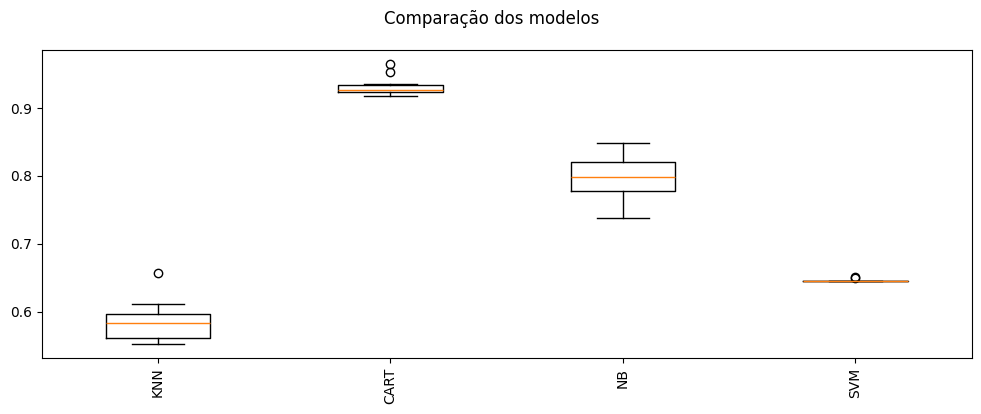

In [8]:
fig = plt.figure(figsize=(12,4))
fig.suptitle("Comparação dos modelos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

## 5.2 - Criação e avaliação de modelos: dados padronizados e normalizados

In [9]:
np.random.seed(8) # semente global

# Listas para armazenar os pipelines
# e os resultados para todas as visões do dataset

pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos a serem utilizados
knn = ("KNN", KNeighborsClassifier())
cart = ("CART", DecisionTreeClassifier())
nb = ("NB", GaussianNB())
svm = ("SVM", SVC())

# Transformações dos dados
standard_scaler = ("StandardScaler", StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

# Criando os pipelines

# Dataset original
pipelines.append(("KNN-orig", Pipeline([knn])))
pipelines.append(("CART-orig", Pipeline([cart])))
pipelines.append(("NB-orig", Pipeline([nb])))
pipelines.append(("SVM-orig", Pipeline([svm])))

# Dataset padronizado
pipelines.append(("KNN-std", Pipeline([standard_scaler, knn])))
pipelines.append(("CART-std", Pipeline([standard_scaler, cart])))
pipelines.append(("NB-std", Pipeline([standard_scaler, nb])))
pipelines.append(("SVM-std", Pipeline([standard_scaler, svm])))

# Dataset normalizado
pipelines.append(("KNN-norm", Pipeline([min_max_scaler, knn])))
pipelines.append(("CART-norm", Pipeline([min_max_scaler, cart])))
pipelines.append(("NB-norm", Pipeline([min_max_scaler, nb])))
pipelines.append(("SVM-norm", Pipeline([min_max_scaler, svm])))

# Avaliação dos pipelines
for name, model in pipelines:
  cv_results = cross_val_score(model,
                               X_train,
                               Y_train,
                               cv=kfold,
                               scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = f"{name}: {cv_results.mean():.2f} ({cv_results.std():.6f})"
  print(msg)

KNN-orig: 0.59 (0.029670)
CART-orig: 0.93 (0.014112)
NB-orig: 0.80 (0.032373)
SVM-orig: 0.65 (0.001971)
KNN-std: 0.73 (0.024804)
CART-std: 0.93 (0.013879)
NB-std: 0.80 (0.032313)
SVM-std: 0.84 (0.026364)
KNN-norm: 0.70 (0.020845)
CART-norm: 0.93 (0.009440)
NB-norm: 0.80 (0.032313)
SVM-norm: 0.84 (0.026791)


### 5.2.1 - Boxplot de comparação dos modelos

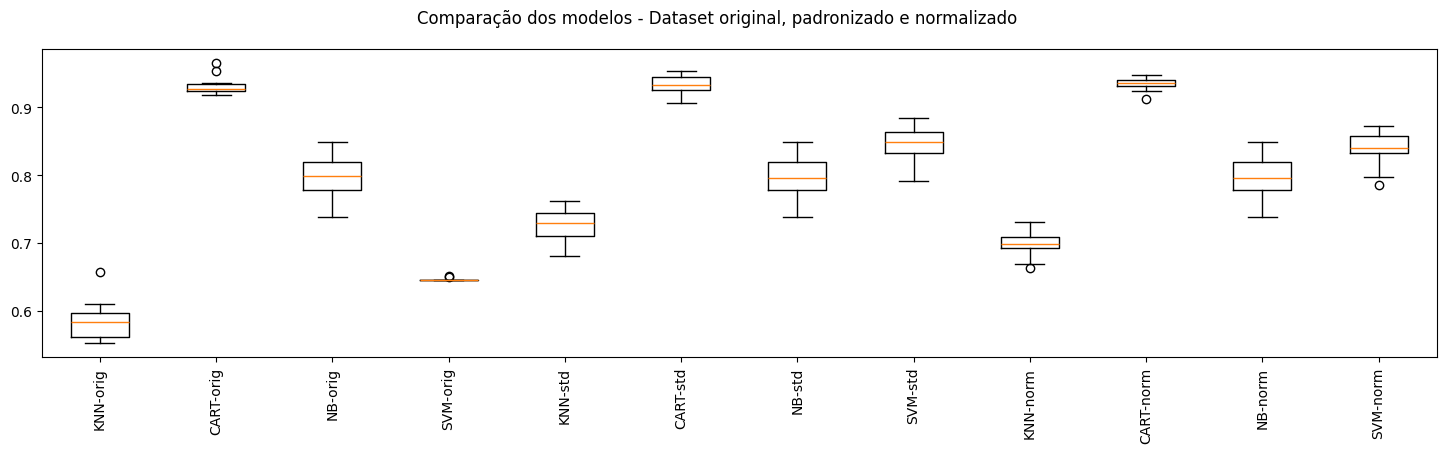

In [10]:
fig = plt.figure(figsize=(18,4))
fig.suptitle("Comparação dos modelos - Dataset original, padronizado e normalizado")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

# 6 - Otimização dos hiperparâmetros

## 6.1 - KNN (KNeighbors Classifier)

Este modelo depende diretamente da distância entre os pontos. Portanto, se uma feature tiver um valor muito maior que outra, ela vai dominar o cálculo da distância.  
Para este modelo os dados de treinamentos sofrerão as seguintes normalização dos dados:  
* Transformar todas as features para ficarem entre 0 e 1 (MinMaxScaler).
* Transformar todas as features para média 0 e desvio padrão 1 (StandardScaler).

In [11]:
# Tuning do KNN
np.random.seed(8)

pipelines_knn = []

# Definindo os componentes do pipeline
knn = ("KNN", KNeighborsClassifier())
standard_scaler = ("StandardScaler", StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

# Criando os pipelines
pipelines_knn.append(("KNN-orig", Pipeline(steps=[knn])))
pipelines_knn.append(("KNN-std", Pipeline(steps=[standard_scaler, knn])))
pipelines_knn.append(("KNN-norm", Pipeline(steps=[min_max_scaler, knn])))

param_knn = {
    'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'KNN__weights': ['uniform', 'distance'],
    'KNN__p': [1, 2],
    'KNN__metric': ['euclidean', 'manhattan', 'minkowski'], # Corrected parameter name
}

# Prepara e executa o GridSearchCV
for name, model in pipelines_knn:
  grid_knn = GridSearchCV(estimator=model,
                      param_grid=param_knn,
                      scoring=scoring,
                      cv=kfold,
                      n_jobs=-1)
  grid_knn.fit(X_train, Y_train)

  # Imprime a melhor configuração
  print(f"{name} - Melhor pontuação: {grid_knn.best_score_:.3f} usando {grid_knn.best_params_}")

KNN-orig - Melhor pontuação: 0.649 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 17, 'KNN__p': 1, 'KNN__weights': 'uniform'}
KNN-std - Melhor pontuação: 0.762 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21, 'KNN__p': 1, 'KNN__weights': 'uniform'}
KNN-norm - Melhor pontuação: 0.745 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13, 'KNN__p': 1, 'KNN__weights': 'uniform'}


## 6.2 - CART (Árvores de Decisão - DecisionTreeClassifier)
Árvores de decisão não necessitam de normalização dos dados. Motivos:
* A árvore de decisão só se importa com ordenações e divisões.
* O valor absoluto da feature não importa, o que importra é a divisão do tipo: "Se a feature X for maior que 4.5, vá para a esquerda. Senão, vá para a direita."  
Ou seja, a escala é irrelevante pois se uma feature estiver no intervalo [0, 1] ou [1000, 10000], a árvore apenas encontrará o melhor ponto de separação dentro daquela escala.

In [12]:
# Não será utilizada a normalização dos dados (StandardScaler e MinMaxScaler)
np.random.seed(8)

pipeline_cart = []
cart = ('cart', DecisionTreeClassifier())
pipeline_cart.append(("CART-orig", Pipeline(steps=[cart])))


param_cart = {
    'cart__max_depth': [3, 5, 10, None],
    'cart__min_samples_split': [2, 5, 10],
    'cart__min_samples_leaf': [1, 2, 4]
}

# Imprime a melhor configuração
for name, model in pipeline_cart:
  grid_cart = GridSearchCV(estimator=model,
                           param_grid=param_cart,
                           cv=kfold,
                           scoring=scoring,
                           n_jobs=-1)
  grid_cart.fit(X_train, Y_train)
  print(f"{name} - Melhor pontuação: {grid_cart.best_score_:.3f} usando {grid_cart.best_params_}")


CART-orig - Melhor pontuação: 0.946 usando {'cart__max_depth': 5, 'cart__min_samples_leaf': 2, 'cart__min_samples_split': 5}


## 6.3 - NB (Naive Bayes)
Naive Bayes também não precisa de normalização dos dados pois trabalha com probabilidades condicionais.
* No caso do GaussianNB, ele assume que cada feature segue uma distribuição normal.
* Como o cálculo é feito feature por feature, as variáveis são tratadas de forma isolada no cálculo da probabilidade.
* Escala irrelevante para o Naive Bayes, porque o modelo ajusta automaticamente a média e o desvio padrão de cada feature.

In [13]:
np.random.seed(8)

pipeline_nb = []
nb = ('nb', GaussianNB())
pipeline_nb.append(("NB-orig", Pipeline(steps=[nb])))

param_nb = {
    'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Imprime a melhor configuração
for name, model in pipeline_nb:
  grid_nb = GridSearchCV(estimator=model,
                         param_grid=param_nb,
                         cv=kfold,
                         scoring=scoring,
                         n_jobs=-1)
  grid_nb.fit(X_train, Y_train)
  print(f"{name} - Melhor pontuação: {grid_nb.best_score_:.3f} usando {grid_nb.best_params_}")


NB-orig - Melhor pontuação: 0.825 usando {'nb__var_smoothing': 1e-07}


## 6.4 - SVC (Support Vector Machine)  
O cálculo do hiperplano ótimo é fortemente influenciado pela magnitude das features. Portanto, assim como para o modelo KNN, os dados para treinamento sofrerão normalização (MinMaxScaler e StandardScaler)  


In [14]:
np.random.seed(8)

pipeline_svm = []
svm = ('svm', SVC())
standard_scaler = ("StandardScaler", StandardScaler())
min_max_scaler = ("MinMaxScaler", MinMaxScaler())

pipeline_svm.append(("SVM-orig", Pipeline(steps=[svm])))
pipeline_svm.append(("SVM-std", Pipeline(steps=[standard_scaler, svm])))
pipeline_svm.append(("SVM-norm", Pipeline(steps=[min_max_scaler, svm])))

param_svm = {
    # 'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__C': [0.1, 1, 10],
    # 'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svm__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Imprime a melhor configuração
for name, model in pipeline_svm:
  grid_svm = GridSearchCV(estimator=model,
                          param_grid=param_svm,
                          cv=kfold,
                          scoring=scoring,
                          n_jobs=-1)
  grid_svm.fit(X_train, Y_train)
  print(f"{name} - Melhor pontuação: {grid_svm.best_score_:.3f} usando {grid_svm.best_params_}")


SVM-orig - Melhor pontuação: 0.828 usando {'svm__C': 0.1, 'svm__kernel': 'linear'}
SVM-std - Melhor pontuação: 0.845 usando {'svm__C': 1, 'svm__kernel': 'rbf'}
SVM-norm - Melhor pontuação: 0.838 usando {'svm__C': 1, 'svm__kernel': 'rbf'}


## 6.5 - Avaliação dos resultados

In [15]:
# KNN
print("Melhor KNN:", grid_knn.best_params_)
y_pred_knn = grid_knn.predict(X_test)
print("Acurácia KNN:", accuracy_score(Y_test, y_pred_knn))
print(classification_report(Y_test, y_pred_knn))

# CART
print("Melhor CART:", grid_cart.best_params_)
y_pred_cart = grid_cart.predict(X_test)
print("Acurácia CART:", accuracy_score(Y_test, y_pred_cart))
print(classification_report(Y_test, y_pred_cart))

# Naive Bayes
y_pred_nb = grid_nb.predict(X_test)
print("Acurácia Naive Bayes:", accuracy_score(Y_test, y_pred_nb))
print(classification_report(Y_test, y_pred_nb))

# SVM
print("Melhor SVM:", grid_svm.best_params_)
y_pred_svm = grid_svm.predict(X_test)
print("Acurácia SVM:", accuracy_score(Y_test, y_pred_svm))
print(classification_report(Y_test, y_pred_svm))

Melhor KNN: {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13, 'KNN__p': 1, 'KNN__weights': 'uniform'}
Acurácia KNN: 0.7627906976744186
              precision    recall  f1-score   support

         0.0       0.75      0.95      0.84       278
         1.0       0.83      0.41      0.55       152

    accuracy                           0.76       430
   macro avg       0.79      0.68      0.70       430
weighted avg       0.78      0.76      0.74       430

Melhor CART: {'cart__max_depth': 5, 'cart__min_samples_leaf': 2, 'cart__min_samples_split': 5}
Acurácia CART: 0.9395348837209302
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       278
         1.0       0.90      0.93      0.92       152

    accuracy                           0.94       430
   macro avg       0.93      0.94      0.93       430
weighted avg       0.94      0.94      0.94       430

Acurácia Naive Bayes: 0.8348837209302326
              precision    recall  f1-

## 6.6 - Comparar validações cruzadas

In [16]:
scores_knn = cross_val_score(grid_knn.best_estimator_, X, Y, cv=kfold, scoring=scoring)
scores_cart = cross_val_score(grid_cart.best_estimator_, X, Y, cv=kfold, scoring=scoring)
scores_nb = cross_val_score(grid_nb, X, Y, cv=kfold, scoring=scoring)
scores_svm = cross_val_score(grid_svm.best_estimator_, X, Y, cv=kfold, scoring=scoring)

print("KNN - Média:", scores_knn.mean(), "Desvio:", scores_knn.std())
print("CART - Média:", scores_cart.mean(), "Desvio:", scores_cart.std())
print("NB - Média:", scores_nb.mean(), "Desvio:", scores_nb.std())
print("SVM - Média:", scores_svm.mean(), "Desvio:", scores_svm.std())

KNN - Média: 0.7412888502499457 Desvio: 0.02034982086325021
CART - Média: 0.949284938056944 Desvio: 0.014462381804042135
NB - Média: 0.832477722234297 Desvio: 0.019310600551208985
SVM - Média: 0.8413388393827429 Desvio: 0.020217586586038463


# 7 - Finalização do modelo

## 7.1 - Avaliação do modelo com o conjunto de testes

In [17]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1,
            kernel='rbf',
            # probability=True
            )
model.fit(rescaledX, Y_train)

# Estimativa de acurácia no conjunto de testes
rescaledX = scaler.transform(X_test)
predictions = model.predict(rescaledX)
print(f"Acurácia no conjunto de testes: {accuracy_score(Y_test, predictions):.2f}")

# Preparação do modelo com todo o Dataset
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model.fit(rescaledX, Y)

Acurácia no conjunto de testes: 0.85


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


## 7.2 - Escolha do modelo SVC para utilização no back-end

#### Considerações Adicionais Sobre o Dataset
* Dataset de 2149 linhas e 34 features:
    * Está no limiar onde a maldição da dimensionalidade já pode afetar modelos baseados em distância (como o KNN).
    * Pode favorecer modelos que reduzem complexidade ou aplicam regularização, como Naive Bayes ou SVM bem ajustado.

# 8 - Outros

## 8.1 - Simulação de dados não existentes para aplicação do modelo

In [18]:
import random

def generate_patient_data():
  random_data = []
  for _ in range(3):
    patient_data = {
        'PatientID': random.randint(8000, 9000),
        'Age': random.randint(65, 100),
        'Gender': random.randint(0, 1),
        'Ethnicity': random.randint(0, 3),
        'EducationLevel': random.randint(0, 3),
        'BMI': round(random.uniform(15, 40), 2),
        'Smoking': random.randint(0, 1),
        'AlcoholConsumption': round(random.uniform(0, 20), 2),
        'PhysicalActivity': round(random.uniform(0, 10), 2),
        'DietQuality': round(random.uniform(0, 10), 2),
        'SleepQuality': round(random.uniform(4, 10), 2),
        'FamilyHistoryAlzheimers': random.randint(0, 1),
        'CardiovascularDisease': random.randint(0, 1),
        'Diabetes': random.randint(0, 1),
        'Depression': random.randint(0, 1),
        'HeadInjury': random.randint(0, 1),
        'Hypertension': random.randint(0, 1),
        'SystolicBP': random.randint(90, 180),
        'DiastolicBP': random.randint(60, 120),
        'CholesterolTotal': round(random.uniform(150, 300), 2),
        'CholesterolLDL': round(random.uniform(50, 200), 2),
        'CholesterolHDL': round(random.uniform(20, 100), 2),
        'CholesterolTriglycerides': round(random.uniform(50, 400), 2),
        'MMSE': round(random.uniform(0, 30), 2),
        'FunctionalAssessment': round(random.uniform(0, 10), 2),
        'MemoryComplaints': random.randint(0, 1),
        'BehavioralProblems': random.randint(0, 1),
        'ADL': round(random.uniform(0, 10), 2),
        'Confusion': random.randint(0, 1),
        'Disorientation': random.randint(0, 1),
        'PersonalityChanges': random.randint(0, 1),
        'DifficultyCompletingTasks': random.randint(0, 1),
        'Forgetfulness': random.randint(0, 1),
    }
    random_data.append(patient_data)
  return pd.DataFrame(random_data)

patient_data = generate_patient_data()

display(patient_data.head())

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,8647,82,0,2,2,17.88,1,10.84,9.29,3.27,...,1.85,5.75,0,0,7.65,1,1,1,0,0
1,8445,74,1,1,3,28.92,0,3.80,7.53,4.55,...,29.12,7.73,1,1,7.21,0,1,0,1,0
2,8439,78,0,0,3,34.92,0,18.65,7.30,1.69,...,16.61,1.62,1,0,7.43,0,1,1,0,1


In [19]:
array_entrada = patient_data.values
X_entrada = array_entrada[:, 0:33]

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledX_entrada = scaler.transform(X_entrada)

# Predição do modelo
prediction = model.predict(rescaledX_entrada)
print(prediction)

[0. 0. 0.]


## 8.2 - Salvando o modelo treinado em .pkl

In [20]:
import pickle
filename = "model.pkl"

with open(filename, 'wb') as file:
    pickle.dump((scaler, model), file)

print("Modelo e scaler salvos com sucesso!")


Modelo e scaler salvos com sucesso!


## 8.3 - Carregando o modelo de .pkl

In [23]:
with open(filename, 'rb') as file:
    scaler, loaded_model = pickle.load(file)

rescaledX_entrada = scaler.transform(patient_data.values)
result = loaded_model.predict(rescaledX_entrada)

print(result)

[0. 0. 0.]
